# Aircraft Risk Assessment for Aircraft Investment

## 1. Business Understanding
### 1.1 Background

Huru Capital Investments Group is a Venture Capital firm with a presence in the construction, real estate and logistics sector in the United States of America. Given its strategic goal to diversify its portfolio, the company is exploring expansion into high growth industries such as the aviation sector. This decision is driven by the expected growth in regional and international air transport. 

The Company intends to purchase and operate airplanes for commercial and private use and hence safety is a critical consideration in selecting the right aircraft.

To support this move, Huru Capital Investments Group is leveraging historical aviation accident data from 1962 to 2023 using a [dataset](https://www.kaggle.com/datasets/khsamaha/aviation-accident-database-synopses) from the National Transportation Safety Board to evaluate potential risks associated with various types of aircraft. This analysis will inform executive decision making on which aircraft models offer the best balance between performance and operational safety.

### 1.2 Objectives

The overall objective of this project is to identify the types of aircraft with the lowest historical risk profile based on accident frequency, severity and related factors. These insights will guide Huru Capital's aviation investment strategy by pinpointing safe and reliable aircraft for acquisition.

The specific objectives are:
* To analyse accident frequency and the severity by the type of aircraft
* To identify trends  and patterns related to aviation accidents and incidents over time and geographical location
* To recommend the top three types of aircraft for investment based on safety performance

### 1.3 Problem Statement

Huru Capital Investments Group is interested in entering the aviation industry without any internal expertise on the potential risks of aircraft. Given the potential financial and reputational risks associated with aviation accidents, the company must base its aircraft selection on data-driven insights. 

This analysis will help answer the following question:

> *Which types of aircraft present the lowest investment risk based on historical safety records?*

### 1.4 Metrics of Success

This project will be considered successful if:

* The analysis identifies aircraft types with historically low accident and fatality rates, helping the company make informed investment decisions.
* At least three clear evidence based recommendations are provided to guide aircraft acquisition
* Key safety patterns (by aircraft type, location, cause or time) are clearly visualised making the risks and opportunities easy to interpret
* The insights directly support Huru Capital's broader goal of expanding into new industries with minimised operational and reputational risk

## 2. Data Understanding

This entails an initial data exploration so as to get an understanding of the shape, structure, contents and quality of the data. 

The data to be utilised in this analysis is drawn from the National Transportation Safety Board Database which contains information from 1962 to 2023 on civil aviation accidents and selected incidents within the United States, its territories and possessions, and in international waters. 

The source of the dataset is https://www.kaggle.com/datasets/khsamaha/aviation-accident-database-synopses

The dataset has two csv files:
* AviationData.csv
* USState_Codes.csv

The aim of this is to:
* identify key variables and their data types
* detect missing or inconsistent values
* gain familiarity with trends, distributions or anomalies

In [1]:
#import the relevant python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 2.1 Initial Data Exploration of Aviation Data

In [2]:
#load the aviation dataset
aviation_df = pd.read_csv('Data/AviationData.csv', encoding='latin-1')

C:\Users\rotic\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
#preview the first 5 rows
aviation_df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [4]:
#preview the last 5 rows
aviation_df.tail()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88888,20221230106513,Accident,ERA23LA097,2022-12-29,"Athens, GA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,30-12-2022


#### Observation

The dataset is uniform from top to bottom

In [5]:
#get the shape of the dataframe (no of rows, no of columns)
aviation_df.shape

(88889, 31)

In [6]:
#get the summary of information on the aviation dataframe
aviation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

#### Observation

The Aviation Dataframe has **88889 rows** and **31 columns**.
It is composed of two data types:
* Numerical data - Float (5 columns)
* Categorical data - Object (26 columns)

27 columns have null values (float(5) and object(22)) with varying null values. The key columns with null values that will need to be cleaned during preparation for analysis are:
* Severity of Injuries
* Total Fatal Injuries
* Total Serious Injuries
* Total Minor Injuries
* Total Uninjured
* Aircraft Make
* Aircraft Model
* Location
* Event Date
* Weather Condition
* Number of Engines
* Type of Engines
* Purpose of Flight
* Broad Phase of Flight

There is information on date provided under the Event Date and Publication Date columns which is represented as object data type but should be converted into date-time data type to allow for trend analysis.

The Location column contains information in both uppercase and lowercase which should be standardised for parsing.

Many events have **zero fatalities** which are still important for identifying incident prone aircraft.

In [7]:
# getting concise statistical summary of numerical data
aviation_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Number.of.Engines,82805.0,1.146585,0.446510,0.0,1.0,1.0,1.0,8.0
Total.Fatal.Injuries,77488.0,0.647855,5.485960,0.0,0.0,0.0,0.0,349.0
Total.Serious.Injuries,76379.0,0.279881,1.544084,0.0,0.0,0.0,0.0,161.0
Total.Minor.Injuries,76956.0,0.357061,2.235625,0.0,0.0,0.0,0.0,380.0
Total.Uninjured,82977.0,5.325440,27.913634,0.0,0.0,1.0,2.0,699.0


In [8]:
# getting concise statistical summary of categorical data
aviation_df.describe(include='O').T

,count,unique,top,freq
Event.Id,88889,87951,20001214X45071,3
Investigation.Type,88889,2,Accident,85015
Accident.Number,88889,88863,DCA22WA214,2
Event.Date,88889,14782,1982-05-16,25
Location,88837,27758,"ANCHORAGE, AK",434
Country,88663,219,United States,82248
Latitude,34382,25592,332739N,19
Longitude,34373,27156,0112457W,24
Airport.Code,50249,10375,NONE,1488
Airport.Name,52790,24871,Private,240


### 2.2 Initial Data Exploration of US State Codes data

In [9]:
#Load the US State Codes dataset
USStateCodes_df = pd.read_csv('Data/USState_Codes.csv', encoding='latin-1')

In [10]:
#Preview the first 5 rows
USStateCodes_df.head()

,US_State,Abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


In [11]:
USStateCodes_df.tail()

,US_State,Abbreviation
57,Virgin Islands,VI
58,Washington_DC,DC
59,Gulf of mexico,GM
60,Atlantic ocean,AO
61,Pacific ocean,PO


#### Observation

The dataset is uniform from top to bottom

In [12]:
USStateCodes_df.shape

(62, 2)

In [13]:
USStateCodes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   US_State      62 non-null     object
 1   Abbreviation  62 non-null     object
dtypes: object(2)
memory usage: 1.1+ KB


#### Observation

The US State Codes Dataframe has **62 rows** and **2 columns**. The data type of the columns is categorical(object). There are no null values.

## 3. Data Preparation

This section includes
* Data cleaning - This entails dropping irrelevant columns, trimming whitespace, handling inconsistent naming, dealing with missing values(Decide whether to impute, drop or create 'Unknown' categories.
* Feature engineering - This entails creating new variables needed for analysis from the available variables such as fatality_rate = total_fatal_injuries / total_aboard and converting the date datatype to date time to enable extraction of the year and month.
* Exploratory Data Analysis - This involves univariate, bivariate and multivariate analysis by application of filters.

### 3.1 Data Cleaning

The raw dataset contains valuable information but also inconsistencies and missing values that could skew the results. This step focuses on:

- Converting columns to the appropriate data types(e.g dates, categories)
- Handling missing or incomplete values
- Standardizing categorical data (e.g Aircraft Make)

In [14]:
#create a copy of the original aviation_df for cleaning
aviation_df1 = aviation_df.copy(deep=True)

#check the first 5 rows
aviation_df1.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


#### 3.1.1. Checking the columns

In [15]:
#checking the columns
aviation_df1.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [16]:
#change the "." separator to "_" in the columns
aviation_df1.columns = aviation_df1.columns.str.replace('.', '_')
aviation_df1.columns

Index(['Event_Id', 'Investigation_Type', 'Accident_Number', 'Event_Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport_Code',
       'Airport_Name', 'Injury_Severity', 'Aircraft_damage',
       'Aircraft_Category', 'Registration_Number', 'Make', 'Model',
       'Amateur_Built', 'Number_of_Engines', 'Engine_Type', 'FAR_Description',
       'Schedule', 'Purpose_of_flight', 'Air_carrier', 'Total_Fatal_Injuries',
       'Total_Serious_Injuries', 'Total_Minor_Injuries', 'Total_Uninjured',
       'Weather_Condition', 'Broad_phase_of_flight', 'Report_Status',
       'Publication_Date'],
      dtype='object')

#### 3.1.2 Checking the columns data types

In [17]:
aviation_df1.dtypes

Event_Id                   object
Investigation_Type         object
Accident_Number            object
Event_Date                 object
Location                   object
Country                    object
Latitude                   object
Longitude                  object
Airport_Code               object
Airport_Name               object
Injury_Severity            object
Aircraft_damage            object
Aircraft_Category          object
Registration_Number        object
Make                       object
Model                      object
Amateur_Built              object
Number_of_Engines         float64
Engine_Type                object
FAR_Description            object
Schedule                   object
Purpose_of_flight          object
Air_carrier                object
Total_Fatal_Injuries      float64
Total_Serious_Injuries    float64
Total_Minor_Injuries      float64
Total_Uninjured           float64
Weather_Condition          object
Broad_phase_of_flight      object
Report_Status 

#### Observation
The Event_Date and Publication_Date are of the Object Data type yet they should be of the date time datatype so as to enable trend analysis and coming up with a new column of year from the data.

In [18]:
#converting to datetime datatype 
aviation_df1['Event_Date'] = pd.to_datetime(aviation_df1['Event_Date'].str.strip('-'))
aviation_df1['Publication_Date'] = pd.to_datetime(aviation_df1['Publication_Date'].str.strip('-'))

#check if the Event Date and Publication Date have been converted to datetime datatype
aviation_df1.dtypes

Event_Id                          object
Investigation_Type                object
Accident_Number                   object
Event_Date                datetime64[ns]
Location                          object
Country                           object
Latitude                          object
Longitude                         object
Airport_Code                      object
Airport_Name                      object
Injury_Severity                   object
Aircraft_damage                   object
Aircraft_Category                 object
Registration_Number               object
Make                              object
Model                             object
Amateur_Built                     object
Number_of_Engines                float64
Engine_Type                       object
FAR_Description                   object
Schedule                          object
Purpose_of_flight                 object
Air_carrier                       object
Total_Fatal_Injuries             float64
Total_Serious_In

In [19]:
#check the first 5 rows
aviation_df1.head()

,Event_Id,Investigation_Type,Accident_Number,Event_Date,Location,Country,Latitude,Longitude,Airport_Code,Airport_Name,...,Purpose_of_flight,Air_carrier,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Weather_Condition,Broad_phase_of_flight,Report_Status,Publication_Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaT
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,1996-09-19
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,2007-02-26
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,2000-12-09
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,1980-04-16


In [20]:
#we can create a new column of year
aviation_df1['Event_Year'] = aviation_df1['Event_Date'].dt.year

#check the first five rows
aviation_df1.head()

,Event_Id,Investigation_Type,Accident_Number,Event_Date,Location,Country,Latitude,Longitude,Airport_Code,Airport_Name,...,Air_carrier,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Weather_Condition,Broad_phase_of_flight,Report_Status,Publication_Date,Event_Year
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaT,1948
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,1996-09-19,1962
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,2007-02-26,1974
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,2000-12-09,1977
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,1980-04-16,1979


#### 3.1.3 Standardising the columns

In [21]:
#checking the unique values of Make and their counts
aviation_df1['Make'].value_counts()

Cessna              22227
Piper               12029
CESSNA               4922
Beech                4330
PIPER                2841
                    ...  
Parrish, Paul           1
AMD                     1
Patton Pitts            1
Mcnabb                  1
RAYTHEON COMPANY        1
Name: Make, Length: 8237, dtype: int64

##### Observation
We note some inconsistencies where Cessna is captured as CESSNA and Piper as PIPER which is one and the same thing. There is a possibility of white spaces also causing similar values to have the differences. 

In [22]:
#standardise the Make variable

aviation_df1['Make'] = aviation_df1['Make'].str.upper().str.strip()
aviation_df1['Make'].value_counts()

CESSNA                27149
PIPER                 14870
BEECH                  5372
BOEING                 2745
BELL                   2722
                      ...  
BUCKER JUNGMEISTER        1
REED MIKE                 1
BRADFORD                  1
HALLQUIST                 1
RAYTHEON COMPANY          1
Name: Make, Length: 7587, dtype: int64

In [23]:
#checking the unique values of Weather and their counts
aviation_df1['Weather_Condition'].value_counts()

VMC    77303
IMC     5976
UNK      856
Unk      262
Name: Weather_Condition, dtype: int64

##### Observation
We note some inconsistencies where UNK is captured as unk which is one and the same thing. While using domain knowledge we note that there are no weather conditions in aviation related with UNK hence we change this to Unknown.

In [24]:
#standardise the Weather Condition variable
aviation_df1['Weather_Condition'] = aviation_df1['Weather_Condition'].str.upper().str.strip()

#replace UNK with 'Unknown'
aviation_df1['Weather_Condition'] = aviation_df1['Weather_Condition'].replace('UNK','Unknown')

#checking the value counts
aviation_df1['Weather_Condition'].value_counts()

VMC        77303
IMC         5976
Unknown     1118
Name: Weather_Condition, dtype: int64

In [25]:
#checking unique values count for Location

aviation_df1['Location'].value_counts()

ANCHORAGE, AK                           434
MIAMI, FL                               200
ALBUQUERQUE, NM                         196
HOUSTON, TX                             193
CHICAGO, IL                             184
                                       ... 
MOUND CITY, MO                            1
Barra da Tijuca, Brazil                   1
MONTROSE, GA                              1
Mugumu, Tanzania, United Republic of      1
COLUMBUS, WI                              1
Name: Location, Length: 27758, dtype: int64

##### Observation
We note some inconsistencies where some data is in uppercase and some in lowercase which may cause them to seem like unique values but represent the same thing.

In [26]:
#ensuring standard format for all data by converting all the names to uppercase
aviation_df1['Location']=aviation_df1['Location'].str.upper().str.strip()

In [27]:
#checking the impact eg. initally Anchorage, AK had 434 value counts but now has 548 meaning there was some similar information in lowercase
aviation_df1['Location'].value_counts()

ANCHORAGE, AK      548
MIAMI, FL          275
HOUSTON, TX        271
ALBUQUERQUE, NM    265
CHICAGO, IL        256
                  ... 
VANSYCLE, OR         1
INDIO HILLS, CA      1
MIDVALE, UT          1
UGANIK BAY, AK       1
ELIZABETH, PA        1
Name: Location, Length: 21977, dtype: int64

In [28]:
aviation_df1['Country'].value_counts()

United States       82248
Brazil                374
Canada                359
Mexico                358
United Kingdom        344
                    ...  
San Juan Islands        1
Scotland                1
Corsica                 1
Gibraltar               1
Yemen                   1
Name: Country, Length: 219, dtype: int64

##### Observation

We note that there are misspellings such as French Guiana instead of Guyana. We also note that there is Saint Vincent and the Grenadines and St Vincent And The Grenadine. We also have initials representing a country such as AY. In view of this, there is a need to standardize the country names by using a country mapping dictionary.  

In [29]:
country_map = {
    "United Kingdom": "United Kingdom",
    "Great Britain": "United Kingdom",
    "Scotland": "United Kingdom",
    "South Korea": "South Korea",
    "Korea, Republic Of": "South Korea",
    "Turks And Caicos": "Turks and Caicos",
    "Turks And Caicos Islands": "Turks and Caicos",
    "Macao": "Macau",
    "Congo": "Republic of the Congo",
    "Antarctica": "Region - Antarctica",
    "Virgin Islands": "United States Virgin Islands",
    "Côte d'Ivoire": "Côte d'Ivoire",
    "Cote d'Ivoire": "Côte d'Ivoire",
    "Federated States Of Micronesia": "Micronesia",
    "Micronesia": "Micronesia",
    "Antigua and Barbuda": "Antigua and Barbuda",
    "Antigua And Barbuda": "Antigua and Barbuda",
    "Republic of North Macedonia": "North Macedonia",
    "St Kitts And Nevis": "Saint Kitts and Nevis",
    "Cayenne": "French Guiana", #city in Guiana
    "South Korean": "South Korea",
    "MU": "Unknown",#unknown country
    "Reunion": "Réunion",
    "Saint Vincent and the Grenadines": "Saint Vincent and the Grenadines",
    "St Vincent And The Grenadines": "Saint Vincent and the Grenadines",
    "ATLANTIC OCEAN": "Region - Atlantic Ocean",
    "Pacific Ocean": "Region - Pacific Ocean",
    "PACIFIC OCEAN": "Region - Pacific Ocean",
    "GULF OF MEXICO": "Region - Gulf of Mexico",
    "CARIBBEAN SEA": "Region - Caribbean Sea",
    "UN": "Unknown",
    "MISSING": "Unknown",
    "Unknown": "Unknown",
    "AY": "Unknown",
    "Wolseley": "Unknown",
    "BLOCK 651A": "Unknown",
    "Malampa": "Vanuatu",  #province in Vanuatu
    "San Juan Islands": "United States",  # Part of Washington State
    "Ivory Coast": "Côte d'Ivoire",
    "French Guiana": "France", 
    "Corsica": "France",  # Region of France
    "St Lucia": "Saint Lucia"
}

In [30]:
#create a function to standardize the country names
def standardize_country(df):
    if pd.isnull(df):
        return df
    return country_map.get(df.strip(), df.strip())

#apply the function
aviation_df1["Country"] = aviation_df1["Country"].apply(standardize_country)

#check the value counts of unique values
aviation_df1['Country'].value_counts()

United States     82249
Brazil              374
Canada              359
Mexico              358
United Kingdom      347
                  ...  
Liberia               1
Nauru                 1
Chad                  1
Eritrea               1
Libya                 1
Name: Country, Length: 200, dtype: int64

In [31]:
#checking value counts for unique values in Model
aviation_df1['Model'].value_counts()

152               2367
172               1756
172N              1164
PA-28-140          932
150                829
                  ... 
AMERICAN AA-1C       1
T-6-SNJ5             1
Tornado I            1
737-3TO              1
SGS233A              1
Name: Model, Length: 12318, dtype: int64

##### Observation

We note some inconsistencies where some values are in upper case and others in lowercase hence there is a need to standardise all to one case.

In [32]:
#Standardizing the Model to be in Uppercase and stripping any white case
aviation_df1['Model'] = aviation_df1['Model'].str.upper().str.strip()

aviation_df1['Model'].value_counts()

152               2367
172               1756
172N              1164
PA-28-140          932
150                829
                  ... 
35A33                1
COMMANDER 690A       1
W2                   1
TS-11 ISKRA          1
SGS233A              1
Name: Model, Length: 11646, dtype: int64

In [33]:
aviation_df1['Amateur_Built'].value_counts()

No     80312
Yes     8475
Name: Amateur_Built, dtype: int64

##### Observation

We note that there are no recurring unique values hence the column is standardised.

In [34]:
aviation_df1['Aircraft_Category'].value_counts()

Airplane             27617
Helicopter            3440
Glider                 508
Balloon                231
Gyrocraft              173
Weight-Shift           161
Powered Parachute       91
Ultralight              30
Unknown                 14
WSFT                     9
Powered-Lift             5
Blimp                    4
UNK                      2
Rocket                   1
ULTR                     1
Name: Aircraft_Category, dtype: int64

##### Observation

We note some inconsistencies in the standard naming of aircraft categories.

In [35]:
#creating a category standardisation map
category_standardization = {
    'WSFT': 'Weight-Shift',
    'ULTR': 'Ultralight',
    'UNK': 'Unknown',
}

#applying the standardisation 
aviation_df1['Aircraft_Category'] = aviation_df1['Aircraft_Category'].replace(category_standardization)

#Converting to a standard title case and stripping any whitespace
aviation_df1['Aircraft_Category'] = aviation_df1['Aircraft_Category'].str.strip().str.title()

#checking the value counts 
aviation_df1['Aircraft_Category'].value_counts()

Airplane             27617
Helicopter            3440
Glider                 508
Balloon                231
Gyrocraft              173
Weight-Shift           170
Powered Parachute       91
Ultralight              31
Unknown                 16
Powered-Lift             5
Blimp                    4
Rocket                   1
Name: Aircraft_Category, dtype: int64

In [36]:
#checking the value counts
aviation_df1['Engine_Type'].value_counts()

Reciprocating      69530
Turbo Shaft         3609
Turbo Prop          3391
Turbo Fan           2481
Unknown             2051
Turbo Jet            703
None                  19
Geared Turbofan       12
Electric              10
NONE                   2
LR                     2
UNK                    1
Hybrid Rocket          1
Name: Engine_Type, dtype: int64

In [37]:
#replacing LR and UNK with "Unknown"
aviation_df1['Engine_Type'] = aviation_df1['Engine_Type'].replace({'UNK':'Unknown','LR':'Unknown'}, )

#Converting to a standard title case and stripping any whitespace
aviation_df1['Engine_Type'] = aviation_df1['Engine_Type'].str.strip().str.title()

#checking the value counts 
aviation_df1['Engine_Type'].value_counts()

Reciprocating      69530
Turbo Shaft         3609
Turbo Prop          3391
Turbo Fan           2481
Unknown             2054
Turbo Jet            703
None                  21
Geared Turbofan       12
Electric              10
Hybrid Rocket          1
Name: Engine_Type, dtype: int64

In [38]:
#checking the value counts 
aviation_df1['Purpose_of_flight'].value_counts()

Personal                     49448
Instructional                10601
Unknown                       6802
Aerial Application            4712
Business                      4018
Positioning                   1646
Other Work Use                1264
Ferry                          812
Aerial Observation             794
Public Aircraft                720
Executive/corporate            553
Flight Test                    405
Skydiving                      182
External Load                  123
Public Aircraft - Federal      105
Banner Tow                     101
Air Race show                   99
Public Aircraft - Local         74
Public Aircraft - State         64
Air Race/show                   59
Glider Tow                      53
Firefighting                    40
Air Drop                        11
ASHO                             6
PUBS                             4
PUBL                             1
Name: Purpose_of_flight, dtype: int64

In [39]:
#replacing ASHO, PUBS and PUBL with "Unknown"
aviation_df1['Purpose_of_flight'] = aviation_df1['Purpose_of_flight'].replace({'ASHO':'Unknown','PUBS':'Unknown','PUBL':'Unknown', 'Air Race show':'Air Race/show'})

#Converting to a standard title case and stripping any whitespace
aviation_df1['Purpose_of_flight'] = aviation_df1['Purpose_of_flight'].str.strip().str.title()

#checking the value counts 
aviation_df1['Purpose_of_flight'].value_counts()

Personal                     49448
Instructional                10601
Unknown                       6813
Aerial Application            4712
Business                      4018
Positioning                   1646
Other Work Use                1264
Ferry                          812
Aerial Observation             794
Public Aircraft                720
Executive/Corporate            553
Flight Test                    405
Skydiving                      182
Air Race/Show                  158
External Load                  123
Public Aircraft - Federal      105
Banner Tow                     101
Public Aircraft - Local         74
Public Aircraft - State         64
Glider Tow                      53
Firefighting                    40
Air Drop                        11
Name: Purpose_of_flight, dtype: int64

In [40]:
#checking the value counts 
aviation_df1['Injury_Severity'].value_counts()

Non-Fatal     67357
Fatal(1)       6167
Fatal          5262
Fatal(2)       3711
Incident       2219
              ...  
Fatal(110)        1
Fatal(138)        1
Fatal(88)         1
Fatal(68)         1
Fatal(45)         1
Name: Injury_Severity, Length: 109, dtype: int64

##### Observation

We note that the information contained in this column contains some quantitave information which can be deduced to be the actual fatality count. In view of this, we can create a new column using these quantitative values and strip these values off to retain the column as a qualitative column.

In [41]:
#look for numbers inside Fatal and extract them. Fillna assumes fatal without a number means 1 fatality
aviation_df1["Fatality_Count"] = aviation_df1["Injury_Severity"].str.extract(r'Fatal\((\d+)\)').fillna(1)

#Set count as 0 for Injury Severity that is not Fatal
aviation_df1.loc[aviation_df1["Injury_Severity"].str.contains("Fatal", na=False), "Fatality_Count"] = 0

#convert the values in the column into integers
aviation_df1["Fatality_Count"] = aviation_df1["Fatality_Count"].astype(int)

In [42]:
#create a function to standardize Injury Severity

def standardize_injury_severity(severity):
    if pd.isna(severity):
        return np.nan
    
    severity = severity.strip().lower()
    
    if "fatal" in severity:
        return "Fatal"
    elif "non-fatal" in severity:
        return "Non-Fatal"
    elif "minor" in severity:
        return "Minor"
    elif "serious" in severity:
        return "Serious"
    elif "incident" in severity:
        return "Incident"
    elif "unavailable" in severity:
        return "Unavailable"
    else:
        return np.nan

#apply the function to the dataframe for standardisation
aviation_df1["Injury_Severity"] = aviation_df1["Injury_Severity"].apply(standardize_injury_severity)

#checking the value counts 
aviation_df1['Injury_Severity'].value_counts()

Fatal          85183
Incident        2219
Minor            218
Serious          173
Unavailable       96
Name: Injury_Severity, dtype: int64

In [43]:
#checking the value counts 
aviation_df1['Aircraft_damage'].value_counts()

Substantial    64148
Destroyed      18623
Minor           2805
Unknown          119
Name: Aircraft_damage, dtype: int64

In [44]:
#checking the value counts 
aviation_df1['Registration_Number'].value_counts()

NONE      344
UNREG     126
None       65
UNK        13
USAF        9
         ... 
N1332J      1
N55LW       1
N563Y       1
N4931L      1
N92FA       1
Name: Registration_Number, Length: 79105, dtype: int64

In [45]:
#standardise the registration numbers to uppercase
aviation_df1['Registration_Number']=aviation_df1['Registration_Number'].str.upper()

#replace None and UNK with null values
aviation_df1['Registration_Number'] = aviation_df1['Registration_Number'].replace({'NONE':np.nan, 'UNK':np.nan})

#checking the value counts 
aviation_df1['Registration_Number'].value_counts()

UNREG      131
UNKNOWN     10
USAF         9
N20752       8
N8402K       6
          ... 
N16035       1
N919Q        1
N8552T       1
N7246Z       1
N92FA        1
Name: Registration_Number, Length: 79092, dtype: int64

#### 3.1.4. Checking for missing values column by column

In [46]:
#checking for missing values in the columns
aviation_df1.isnull().sum()

Event_Id                      0
Investigation_Type            0
Accident_Number               0
Event_Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport_Code              38640
Airport_Name              36099
Injury_Severity            1000
Aircraft_damage            3194
Aircraft_Category         56602
Registration_Number        1742
Make                         63
Model                        92
Amateur_Built               102
Number_of_Engines          6084
Engine_Type                7077
FAR_Description           56866
Schedule                  76307
Purpose_of_flight          6192
Air_carrier               72241
Total_Fatal_Injuries      11401
Total_Serious_Injuries    12510
Total_Minor_Injuries      11933
Total_Uninjured            5912
Weather_Condition          4492
Broad_phase_of_flight     27165
Report_Status              6381
Publication_Date          13771
Event_Ye

#### Dealing with missing data for numerical variables

The following numerical variables have missing data/null values as shown below:
* Number_of_Engines          6084
* Total_Fatal_Injuries      11401
* Total_Serious_Injuries    12510
* Total_Minor_Injuries      11933
* Total_Uninjured            5912

In [47]:
#checking the statistical summary of numerical variables

aviation_df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Number_of_Engines,82805.0,1.146585,0.446510,0.0,1.0,1.0,1.0,8.0
Total_Fatal_Injuries,77488.0,0.647855,5.485960,0.0,0.0,0.0,0.0,349.0
Total_Serious_Injuries,76379.0,0.279881,1.544084,0.0,0.0,0.0,0.0,161.0
Total_Minor_Injuries,76956.0,0.357061,2.235625,0.0,0.0,0.0,0.0,380.0
Total_Uninjured,82977.0,5.325440,27.913634,0.0,0.0,1.0,2.0,699.0
Event_Year,88889.0,1999.206662,11.888226,1948.0,1989.0,1998.0,2009.0,2022.0
Fatality_Count,88889.0,0.041692,0.199887,0.0,0.0,0.0,0.0,1.0


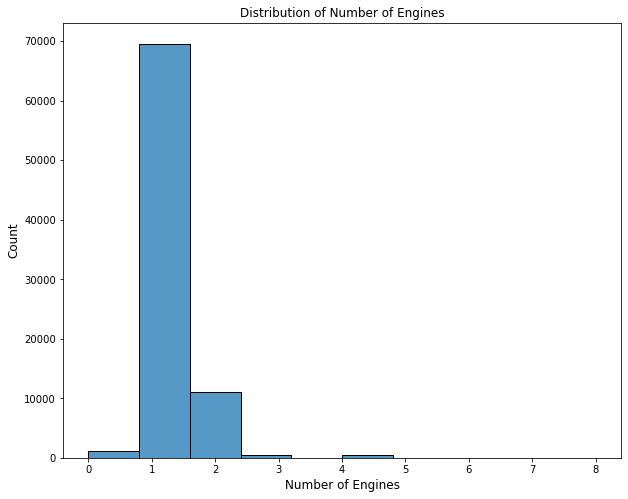

In [48]:
#visualise the histogram for Number of Engines
fig,ax = plt.subplots(figsize=(10,8))
sns.histplot(aviation_df1.Number_of_Engines, bins=10)
plt.xlabel('Number of Engines', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Number of Engines', fontsize=12)
plt.show()

##### Observation

The histogram plot shows a right skewed plot hence to impute the values of the Number of Engines we can use the median. 

In [49]:
#imputing the Number of Engines using the median and filling up the missing values using fillna

aviation_df1['Number_of_Engines'].fillna((aviation_df1['Number_of_Engines'].median()), inplace=True)
aviation_df1.isna().sum()

Event_Id                      0
Investigation_Type            0
Accident_Number               0
Event_Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport_Code              38640
Airport_Name              36099
Injury_Severity            1000
Aircraft_damage            3194
Aircraft_Category         56602
Registration_Number        1742
Make                         63
Model                        92
Amateur_Built               102
Number_of_Engines             0
Engine_Type                7077
FAR_Description           56866
Schedule                  76307
Purpose_of_flight          6192
Air_carrier               72241
Total_Fatal_Injuries      11401
Total_Serious_Injuries    12510
Total_Minor_Injuries      11933
Total_Uninjured            5912
Weather_Condition          4492
Broad_phase_of_flight     27165
Report_Status              6381
Publication_Date          13771
Event_Ye

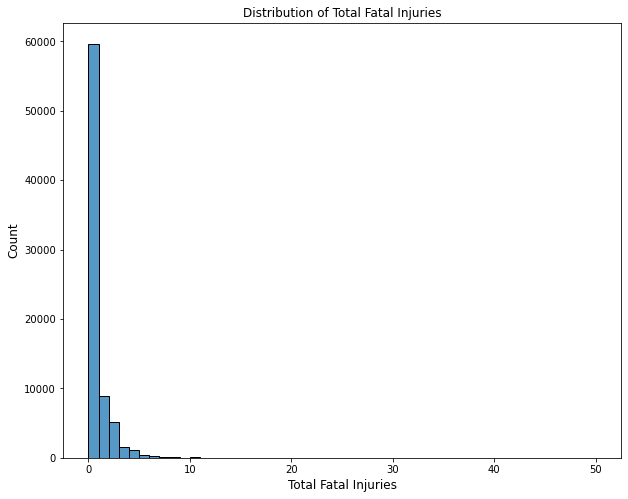

In [50]:
#visualise the histogram for Total Fatal Injuries
fig,ax = plt.subplots(figsize=(10,8))
sns.histplot(aviation_df1.Total_Fatal_Injuries, bins=50, binrange=(0,50))
plt.xlabel('Total Fatal Injuries', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Total Fatal Injuries', fontsize=12)
plt.show()

##### Observation

The histogram shows a positive skewness which can also be deduced from the high number of counts for the lower numbers of total fatal injuries. An appropriate method for imputing missing values would be to impute with the median. 

In [51]:
#imputing the Total Fatal Injuries using the median and filling up the missing values using fillna

aviation_df1['Total_Fatal_Injuries'].fillna((aviation_df1['Total_Fatal_Injuries'].median()), inplace=True)
aviation_df1.isna().sum()

Event_Id                      0
Investigation_Type            0
Accident_Number               0
Event_Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport_Code              38640
Airport_Name              36099
Injury_Severity            1000
Aircraft_damage            3194
Aircraft_Category         56602
Registration_Number        1742
Make                         63
Model                        92
Amateur_Built               102
Number_of_Engines             0
Engine_Type                7077
FAR_Description           56866
Schedule                  76307
Purpose_of_flight          6192
Air_carrier               72241
Total_Fatal_Injuries          0
Total_Serious_Injuries    12510
Total_Minor_Injuries      11933
Total_Uninjured            5912
Weather_Condition          4492
Broad_phase_of_flight     27165
Report_Status              6381
Publication_Date          13771
Event_Ye

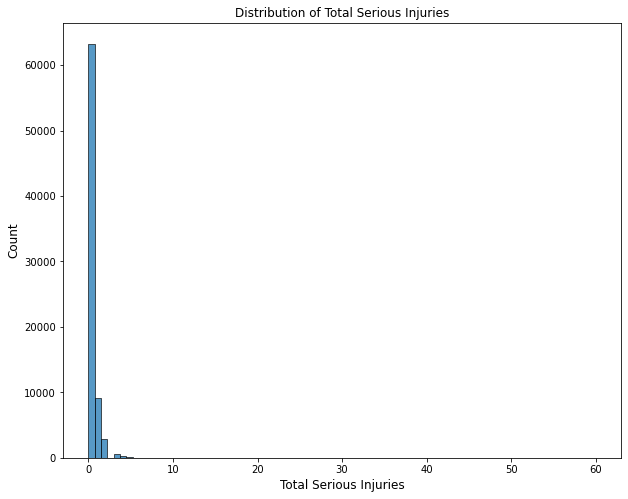

In [52]:
#visualise the histogram for Total Serious Injuries
fig,ax = plt.subplots(figsize=(10,8))
sns.histplot(aviation_df1.Total_Serious_Injuries, bins=80, binrange=(0,60))
plt.xlabel('Total Serious Injuries', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Total Serious Injuries', fontsize=12)
plt.show()

##### Observation

The histogram shows a positive skewness which can also be deduced from the high number of counts for the lower numbers of total serious injuries. An appropriate method for imputing missing values would be to impute with the median. 

In [53]:
#imputing the Total Serious Injuries using the median and filling up the missing values using fillna

aviation_df1['Total_Serious_Injuries'].fillna((aviation_df1['Total_Serious_Injuries'].median()), inplace=True)
aviation_df1.isna().sum()

Event_Id                      0
Investigation_Type            0
Accident_Number               0
Event_Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport_Code              38640
Airport_Name              36099
Injury_Severity            1000
Aircraft_damage            3194
Aircraft_Category         56602
Registration_Number        1742
Make                         63
Model                        92
Amateur_Built               102
Number_of_Engines             0
Engine_Type                7077
FAR_Description           56866
Schedule                  76307
Purpose_of_flight          6192
Air_carrier               72241
Total_Fatal_Injuries          0
Total_Serious_Injuries        0
Total_Minor_Injuries      11933
Total_Uninjured            5912
Weather_Condition          4492
Broad_phase_of_flight     27165
Report_Status              6381
Publication_Date          13771
Event_Ye

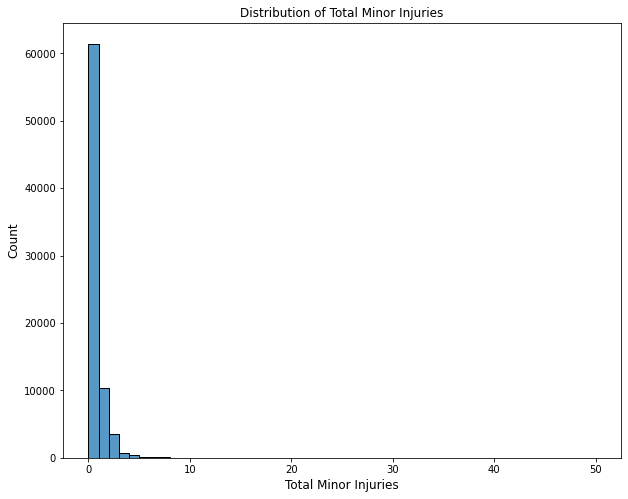

In [54]:
#visualise the histogram for Total Minor Injuries
fig,ax = plt.subplots(figsize=(10,8))
sns.histplot(aviation_df1.Total_Minor_Injuries, bins=50, binrange=(0,50))
plt.xlabel('Total Minor Injuries', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Total Minor Injuries', fontsize=12)
plt.show()

##### Observation

The histogram shows a positive skewness which can also be deduced from the high number of counts for the lower numbers of total serious injuries. An appropriate method for imputing missing values would be to impute with the median. 

In [55]:
#imputing the Total Minor Injuries using the median and filling up the missing values using fillna

aviation_df1['Total_Minor_Injuries'].fillna((aviation_df1['Total_Minor_Injuries'].median()), inplace=True)
aviation_df1.isna().sum()

Event_Id                      0
Investigation_Type            0
Accident_Number               0
Event_Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport_Code              38640
Airport_Name              36099
Injury_Severity            1000
Aircraft_damage            3194
Aircraft_Category         56602
Registration_Number        1742
Make                         63
Model                        92
Amateur_Built               102
Number_of_Engines             0
Engine_Type                7077
FAR_Description           56866
Schedule                  76307
Purpose_of_flight          6192
Air_carrier               72241
Total_Fatal_Injuries          0
Total_Serious_Injuries        0
Total_Minor_Injuries          0
Total_Uninjured            5912
Weather_Condition          4492
Broad_phase_of_flight     27165
Report_Status              6381
Publication_Date          13771
Event_Ye

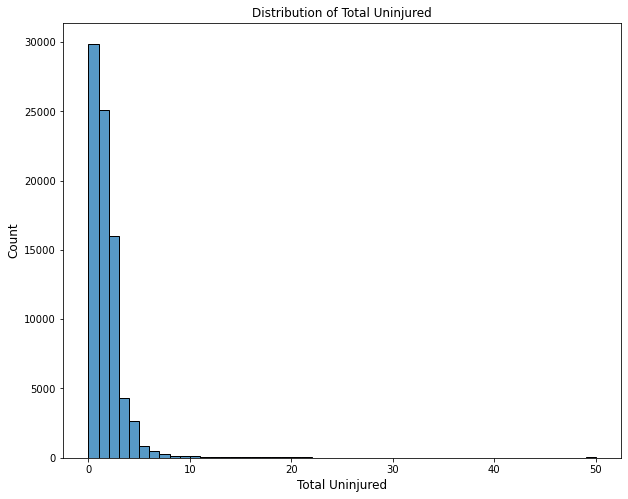

In [56]:
#visualise the histogram for Total Uninjured
fig,ax = plt.subplots(figsize=(10,8))
sns.histplot(aviation_df1.Total_Uninjured, bins=50, binrange=(0,50))
plt.xlabel('Total Uninjured', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Total Uninjured', fontsize=12)
plt.show()

##### Observation

The histogram shows a positive skewness which can also be deduced from the high number of counts for the lower numbers of total serious injuries. An appropriate method for imputing missing values would be to impute with the median. 

In [57]:
#imputing the Total Uninjured using the median and filling up the missing values using fillna

aviation_df1['Total_Uninjured'].fillna((aviation_df1['Total_Uninjured'].median()), inplace=True)
aviation_df1.isna().sum()

Event_Id                      0
Investigation_Type            0
Accident_Number               0
Event_Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport_Code              38640
Airport_Name              36099
Injury_Severity            1000
Aircraft_damage            3194
Aircraft_Category         56602
Registration_Number        1742
Make                         63
Model                        92
Amateur_Built               102
Number_of_Engines             0
Engine_Type                7077
FAR_Description           56866
Schedule                  76307
Purpose_of_flight          6192
Air_carrier               72241
Total_Fatal_Injuries          0
Total_Serious_Injuries        0
Total_Minor_Injuries          0
Total_Uninjured               0
Weather_Condition          4492
Broad_phase_of_flight     27165
Report_Status              6381
Publication_Date          13771
Event_Ye

#### Dealing with missing data for categorical variables

Given the high number of missing values for the categorical variables, there will be a need to drop some of the columns which may not be key for our analysis. For those that are key, then we may need to either impute using domain knowledge or with the mode or introduce a new variable "Unknown" for the null/missing values. 

In [58]:
#checking the statistical summary of categorical variables

aviation_df1.describe(include='O').T

,count,unique,top,freq
Event_Id,88889,87951,20001214X45071,3
Investigation_Type,88889,2,Accident,85015
Accident_Number,88889,88863,DCA22WA214,2
Location,88837,21977,"ANCHORAGE, AK",548
Country,88663,200,United States,82249
Latitude,34382,25592,332739N,19
Longitude,34373,27156,0112457W,24
Airport_Code,50249,10375,NONE,1488
Airport_Name,52790,24871,Private,240
Injury_Severity,87889,5,Fatal,85183


In [59]:
#checking null values in the Location variable
aviation_df1['Location'].isna().sum()

52

In [60]:
#percentage of null values in Location
percentage = (aviation_df1['Location'].isna().sum())/(aviation_df.shape[0]) * 100

print(f'The percentage of Location null values is {percentage}%')

The percentage of Location null values is 0.05849992687509141%


##### Observation
The best option would be dropping the rows with null values or imputing with 'Unknown'  given they are few (52 out of 88889 rows) and it is not prudent to impute the location of an accident using the mode as this would skew the data.

In [61]:
#imputing Location null values with "unknown"
aviation_df1['Location'].fillna('Unknown', inplace=True)

In [62]:
aviation_df1.isna().sum()

Event_Id                      0
Investigation_Type            0
Accident_Number               0
Event_Date                    0
Location                      0
Country                     226
Latitude                  54507
Longitude                 54516
Airport_Code              38640
Airport_Name              36099
Injury_Severity            1000
Aircraft_damage            3194
Aircraft_Category         56602
Registration_Number        1742
Make                         63
Model                        92
Amateur_Built               102
Number_of_Engines             0
Engine_Type                7077
FAR_Description           56866
Schedule                  76307
Purpose_of_flight          6192
Air_carrier               72241
Total_Fatal_Injuries          0
Total_Serious_Injuries        0
Total_Minor_Injuries          0
Total_Uninjured               0
Weather_Condition          4492
Broad_phase_of_flight     27165
Report_Status              6381
Publication_Date          13771
Event_Ye

In [63]:
#checking the number of null values of Country
aviation_df1['Country'].isnull().sum()

226

##### Observation

Given the Country Variable is important for our analysis given the Company aims to operate the planes in the United States of America, we note that it has 226 null values. We also note that if the null values have location and the location is in the United States of America, we can impute the country using the location using the US State Codes CSV.

In [64]:
#converting the USStateCodes_df column with the abbreviations into a list
us_state_codes = USStateCodes_df['Abbreviation'].str.upper().tolist()
us_state_codes

['AL',
 'AK',
 'AZ',
 'AR',
 'CA',
 'CO',
 'CT',
 'DE',
 'FL',
 'GA',
 'HI',
 'ID',
 'IL',
 'IN',
 'IA',
 'KS',
 'KY',
 'LA',
 'ME',
 'MD',
 'MA',
 'MI',
 'MN',
 'MS',
 'MO',
 'MT',
 'NE',
 'NV',
 'NH',
 'NJ',
 'NM',
 'NY',
 'NC',
 'ND',
 'OH',
 'OK',
 'OR',
 'PA',
 'RI',
 'SC',
 'SD',
 'TN',
 'TX',
 'UT',
 'VT',
 'VA',
 'WA',
 'WV',
 'WI',
 'WY',
 'AS',
 'GU',
 'MH',
 'FM',
 'MP',
 'PW',
 'PR',
 'VI',
 'DC',
 'GM',
 'AO',
 'PO']

In [65]:
#defining a function to infer country from location

def infer_country(df):
    if pd.isnull(df['Country']) and isinstance(df['Location'], str):
        for state in us_state_codes:
            if  df['Location'].strip()[-2:] == state:
                return 'United States'
    return df['Country']

#apply the function to impute the values              
aviation_df1['Country'] = aviation_df1.apply(infer_country, axis=1)

#view the remaining null values
print("Remaining nulls in 'Country':", aviation_df1['Country'].isna().sum())

Remaining nulls in 'Country': 169


##### Observation

We still have null values and therefore we can use the Registration Numbers to impute the Country further using domain knowledge.

In [66]:
#we can create the registration prefix dictionary map

reg_prefix_map = {
    'N': 'United States',
    'USAF': 'United States',
    'USN': 'United States',
    'C-': 'Canada',
    'G-': 'United Kingdom',
    'VH-': 'Australia',
    'ZK-': 'New Zealand',
    'F-': 'France',
    'D-': 'Germany',
    'EC-': 'Spain',
    'I-': 'Italy',
    'JA': 'Japan',
    'HS-': 'Thailand',
    'B-': 'China',
    'PR-': 'Brazil'
}

#defining the function for infering the country
def infer_country_reg(df):
    if pd.isnull(df['Country']) and isinstance(df.get('Registration_Number'), str):
        reg = df['Registration_Number'].upper().strip()
        for prefix, country in reg_prefix_map.items():
            if reg.startswith(prefix):
                return country
    return df['Country']

#applying the function
aviation_df1['Country'] = aviation_df1.apply(infer_country_reg, axis=1)

#view the remaining null values
print("Remaining nulls in 'Country':", aviation_df1['Country'].isna().sum())

Remaining nulls in 'Country': 8


In [67]:
#impute the remaining missing values in Country with the value of the highest mode
aviation_df1['Country'] = aviation_df1['Country'].fillna(aviation_df1['Country'].mode()[0])

#check for missing values
aviation_df1['Country'].isna().sum()

0

In [68]:
aviation_df1['Amateur_Built'].value_counts()

No     80312
Yes     8475
Name: Amateur_Built, dtype: int64

##### Observation

As we can see, the type of build of the aircraft will influence the choice of Aircraft hence this variable is key in our analysis to see which aircraft is safer based on its build. The variable has 100 null values hence we can choose to drop the rows with null values or impute it with an 'Unknown' or use domain knowledge. In this case, we will fill the missing values with 'Unknown'.

In [69]:
aviation_df1['Amateur_Built'].fillna('Unknown', inplace=True)
aviation_df1.isna().sum()

Event_Id                      0
Investigation_Type            0
Accident_Number               0
Event_Date                    0
Location                      0
Country                       0
Latitude                  54507
Longitude                 54516
Airport_Code              38640
Airport_Name              36099
Injury_Severity            1000
Aircraft_damage            3194
Aircraft_Category         56602
Registration_Number        1742
Make                         63
Model                        92
Amateur_Built                 0
Number_of_Engines             0
Engine_Type                7077
FAR_Description           56866
Schedule                  76307
Purpose_of_flight          6192
Air_carrier               72241
Total_Fatal_Injuries          0
Total_Serious_Injuries        0
Total_Minor_Injuries          0
Total_Uninjured               0
Weather_Condition          4492
Broad_phase_of_flight     27165
Report_Status              6381
Publication_Date          13771
Event_Ye

In [70]:
aviation_df1['Weather_Condition'].isnull().sum()

4492

##### Observation

Given the Weather Condition may influence the aircraft accidents, this is a key parameter for our analysis and hence there is a need to deal with the missing data. Given the relationship between the broad phase of flight and weather where take off and landing correlates with VMC and Enroute phases can occur in IMC. 

In [71]:
#creating a mapping dictionary of the grouping of the phase of flight with the weather condition
weather_by_phase = (
    aviation_df1[aviation_df1['Weather_Condition'].notna()] #checks for rows where the weather condition does not have null values
    .groupby('Broad_phase_of_flight')['Weather_Condition'] #groups them by the Broad Phase of Flight
    .agg(lambda x: x.mode().iloc[0])
    .to_dict()
)

#applying the dictionary to the dataframe

aviation_df1['Weather_Condition'] = aviation_df1.apply(
    lambda df: weather_by_phase.get(df['Broad_phase_of_flight'], df['Weather_Condition']) 
    if pd.isna(df['Weather_Condition']) else df['Weather_Condition'],
    axis=1
)

#checking the remaining null values
aviation_df1['Weather_Condition'].isna().sum()

4439

In [72]:
aviation_df1['Weather_Condition'].value_counts()

VMC        77356
IMC         5976
Unknown     1118
Name: Weather_Condition, dtype: int64

In [73]:
#fill the missing values for Weather Condition with "Unknown"

aviation_df1['Weather_Condition'].fillna('Unknown', inplace=True)
aviation_df1.isna().sum()

Event_Id                      0
Investigation_Type            0
Accident_Number               0
Event_Date                    0
Location                      0
Country                       0
Latitude                  54507
Longitude                 54516
Airport_Code              38640
Airport_Name              36099
Injury_Severity            1000
Aircraft_damage            3194
Aircraft_Category         56602
Registration_Number        1742
Make                         63
Model                        92
Amateur_Built                 0
Number_of_Engines             0
Engine_Type                7077
FAR_Description           56866
Schedule                  76307
Purpose_of_flight          6192
Air_carrier               72241
Total_Fatal_Injuries          0
Total_Serious_Injuries        0
Total_Minor_Injuries          0
Total_Uninjured               0
Weather_Condition             0
Broad_phase_of_flight     27165
Report_Status              6381
Publication_Date          13771
Event_Ye

In [74]:
#checking the number of null values of Make
aviation_df1['Make'].isnull().sum()

63

##### Observation

Given the fact that the Make variable is important for our analysis as we plan to recommend the type of aircraft to be purchased, imputing it with the mode would skew the data and equally create an assumption that the missing data on the makes was from the most frequent Make. It would be prudent to either impute using domain knowledge or introduce an unknown make for analysis as opposed to dropping the rows. Given that the Aircraft Model often includes a recognizable prefix that matches a specific Make of an Aircraft, then we could impute the missing values of the Make using the Model column.

In [75]:
#we can infer the model from the make using a mapping dictionary of the model as the key and the make of the aircraft as the values
model_make_map = {
    'PA': 'PIPER',
    'P28': 'PIPER',
    'C172': 'CESSNA',
    '172': 'CESSNA',
    '182': 'CESSNA',
    'C-': 'CESSNA',
    '737': 'BOEING',
    '747': 'BOEING',
    '777': 'BOEING',
    'A320': 'AIRBUS',
    'A330': 'AIRBUS',
    'A340': 'AIRBUS',
    'A350': 'AIRBUS',
    'R22': 'ROBINSON',
    'R44': 'ROBINSON',
    'SR22': 'CIRRUS',
    'SR20': 'CIRRUS',
    'B206': 'BELL',
    '206': 'BELL',
    'MD-': 'MCDONNELL DOUGLAS',
    'DC-': 'DOUGLAS',
    'DA40': 'DIAMOND',
    'DA42': 'DIAMOND',
    'GULF': 'GULFSTREAM',
    'LEAR': 'LEARJET',
    'EMB': 'EMBRAER',
    'CL-': 'BOMBARDIER',
    'CRJ': 'BOMBARDIER'
}


In [76]:
#define an imputation function
def infer_make(df):
    if pd.isna(df['Make']) and isinstance(df.get('Model'), str):
        model = df['Model'].upper().strip()
        for prefix, make in model_make_map.items():
            if model.startswith(prefix):
                return make
    return df['Make']

#apply the function
aviation_df1['Make'] = aviation_df1.apply(infer_make, axis=1)

#checking the number of null values of Make
aviation_df1['Make'].isnull().sum()

61

In [77]:
#we can drop the rows with null values in the 'Make' column
aviation_df1.dropna(subset=['Make'],inplace=True)

print(aviation_df1.shape)

aviation_df1.isna().sum()

(88828, 33)


Event_Id                      0
Investigation_Type            0
Accident_Number               0
Event_Date                    0
Location                      0
Country                       0
Latitude                  54468
Longitude                 54477
Airport_Code              38593
Airport_Name              36053
Injury_Severity             983
Aircraft_damage            3177
Aircraft_Category         56552
Registration_Number        1704
Make                          0
Model                        49
Amateur_Built                 0
Number_of_Engines             0
Engine_Type                7027
FAR_Description           56855
Schedule                  76283
Purpose_of_flight          6151
Air_carrier               72204
Total_Fatal_Injuries          0
Total_Serious_Injuries        0
Total_Minor_Injuries          0
Total_Uninjured               0
Weather_Condition             0
Broad_phase_of_flight     27115
Report_Status              6349
Publication_Date          13769
Event_Ye

In [78]:
aviation_df1['Aircraft_Category'].value_counts()

Airplane             27609
Helicopter            3437
Glider                 508
Balloon                231
Gyrocraft              173
Weight-Shift           170
Powered Parachute       91
Ultralight              31
Unknown                 16
Powered-Lift             5
Blimp                    4
Rocket                   1
Name: Aircraft_Category, dtype: int64

In [79]:
#checking number of null values for Aircraft Category
aviation_df1['Aircraft_Category'].isna().sum()

56552

##### Observation

We note that we have numerous null values. However, the type of aircraft involved in the accident is key for our analysis given the company is interested in purchasing and operating airplanes for commercial and private purposes only. We cannot use statistical imputation because this would introduce noise into our data frame. Using domain knowledge, we can be able to impute values using the known relationship between the Make of an Aircraft and the Category drawn from the FAA and NTSB.

In [80]:
#We create a mapping dictionary with the make of the aircraft as the key and the Aircraft Category as the Value
make_map = {
    "CESSNA": "Airplane",
    "PIPER": "Airplane",
    "BEECH": "Airplane",
    "MOONEY": "Airplane",
    "DIAMOND": "Airplane",
    "BOEING": "Airplane",
    "AIRBUS": "Airplane",
    "DOUGLAS": "Airplane",
    "BOMBARDIER": "Airplane",
    "EMBRAER": "Airplane",
    "GULFSTREAM": "Airplane",
    "LEARJET": "Airplane",
    "FAIRCHILD": "Airplane",
    "GRUMMAN": "Airplane",
    "HAWKER": "Airplane",
    "MCDONNELL DOUGLAS": "Airplane",
    "VANS": "Airplane",
    "SOCATA": "Airplane",
    "CIRRUS": "Airplane",
    "ROCKWELL": "Airplane",
    "RAYTHEON": "Airplane",
    "NORTH AMERICAN": "Airplane",
    "ROBINSON": "Helicopter",
    "BELL": "Helicopter",
    "SIKORSKY": "Helicopter",
    "HUGHES": "Helicopter",
    "ENSTROM": "Helicopter",
    "EUROCOPTER": "Helicopter",
    "AIRBUS HELICOPTERS": "Helicopter",
    "AGUSTA": "Helicopter",
    "MD HELICOPTERS": "Helicopter",
    "KAMAN": "Helicopter",
    "SCHWEIZER": "Glider",
    "GROB": "Glider",
    "DG FLUGZEUGBAU": "Glider",
    "SLET": "Glider",
    "ALEXANDER SCHLEICHER": "Glider",
    "SZD": "Glider",
    "CAMERON BALLOONS": "Balloon",
    "AEROSTAR": "Balloon",
    "LINSTRAND": "Balloon",
    "THUNDER & COLT": "Balloon",
    "AUTOGYRO": "Gyroplane",
    "MAGNI": "Gyroplane",
    "ELA": "Gyroplane",
    "QUICKSILVER": "Ultralight",
    "RANS": "Ultralight",
    "CHALLENGER": "Ultralight",
    "ZENITH": "Ultralight",
    "KITFOX": "Ultralight",
    "AERONCA": "Ultralight",
    "EXPERIMENTAL": "Ultralight",
}


In [81]:
# Fill missing values in Aircraft Category using Make
def infer_category(df):
    if pd.isna(df['Aircraft_Category']):
        return make_map.get(df['Make'])
    else:
        return df['Aircraft_Category']
    
#Apply the function to the dataframe
aviation_df1['Aircraft_Category'] = aviation_df1.apply(infer_category, axis=1)

#check the remaining null values
print('The remaining null values in Aircraft Category are:', aviation_df1['Aircraft_Category'].isna().sum())

#check the value counts of unique values
aviation_df1['Aircraft_Category'].value_counts()

The remaining null values in Aircraft Category are: 14280


Airplane             65121
Helicopter            7105
Glider                1056
Ultralight             486
Balloon                320
Gyrocraft              173
Weight-Shift           170
Powered Parachute       91
Unknown                 16
Powered-Lift             5
Blimp                    4
Rocket                   1
Name: Aircraft_Category, dtype: int64

In [82]:
# Group by Model and see which Aircraft Category is most common
model_cat_map = aviation_df1[aviation_df1['Aircraft_Category'].notna()]\
                    .groupby('Model')['Aircraft_Category']\
                    .agg(lambda x: x.value_counts().idxmax()).to_dict()

# Group by Engine Type and Number of Engines and see which Aircraft Category is most common
engine_cat_map = aviation_df1[aviation_df1['Aircraft_Category'].notna()]\
                    .groupby(['Engine_Type', 'Number_of_Engines'])['Aircraft_Category']\
                    .agg(lambda x: x.value_counts().idxmax()).to_dict()

In [83]:
# Define a function to infer Aircraft Category using Model, Type of Engine and Number of Engines
def infer_aircraft_category(df):
    if pd.notna(df['Aircraft_Category']):
        return df['Aircraft_Category']
    
    if df['Model'] in model_cat_map:
        return model_cat_map[df['Model']]

    engine = (df['Engine_Type'], df['Number_of_Engines'])
    if engine in engine_cat_map:
        return engine_cat_map[engine]

# Apply the function to the dataframe
aviation_df1['Aircraft_Category'] = aviation_df1.apply(infer_aircraft_category, axis=1)

#check the remaining null values
print('The remaining null values in Aircraft Category are:', aviation_df1['Aircraft_Category'].isna().sum())

#check the value counts of unique values
aviation_df1['Aircraft_Category'].value_counts()

The remaining null values in Aircraft Category are: 136


Airplane             77499
Helicopter            8031
Glider                1559
Balloon                522
Ultralight             511
Gyrocraft              268
Weight-Shift           178
Powered Parachute       94
Unknown                 16
Blimp                    7
Powered-Lift             6
Rocket                   1
Name: Aircraft_Category, dtype: int64

In [84]:
#We can replace the remaining null values with 'unknown'
aviation_df1['Aircraft_Category'].fillna('Unknown', inplace=True)

#checking for null values in the columns
aviation_df1.isna().sum()

Event_Id                      0
Investigation_Type            0
Accident_Number               0
Event_Date                    0
Location                      0
Country                       0
Latitude                  54468
Longitude                 54477
Airport_Code              38593
Airport_Name              36053
Injury_Severity             983
Aircraft_damage            3177
Aircraft_Category             0
Registration_Number        1704
Make                          0
Model                        49
Amateur_Built                 0
Number_of_Engines             0
Engine_Type                7027
FAR_Description           56855
Schedule                  76283
Purpose_of_flight          6151
Air_carrier               72204
Total_Fatal_Injuries          0
Total_Serious_Injuries        0
Total_Minor_Injuries          0
Total_Uninjured               0
Weather_Condition             0
Broad_phase_of_flight     27115
Report_Status              6349
Publication_Date          13769
Event_Ye

In [85]:
#checking for null values in the 'Model' column
aviation_df1['Model'].isna().sum()

49

##### Observation
As we can see, the information provided here is about the type of model of the aircraft. In this case, the type of model is a unique identifier of an aircraft and hence it would be best to impute null values by using rows with the same Make, Engine Type and Aircraft Category.

In [86]:
# Create a function to fill missing Model within the groups
def fill_model_with_mode(group):
    if group['Model'].isnull().all(): #checks that all the columns have null values
        return group
    mode = group['Model'].mode()
    if not mode.empty:
        group['Model'] = group['Model'].fillna(mode[0]) #fills with the highest occuring mode
    return group

# Apply the function to the group and reset the index
aviation_df1 = aviation_df1.groupby(['Make', 'Engine_Type', 'Aircraft_Category'], dropna=False).apply(fill_model_with_mode).reset_index(drop=True)

#check the null values in the Model variable
print('The remaining null values in Model are:', aviation_df1['Model'].isna().sum())

The remaining null values in Model are: 15


In [87]:
#fill the remaining null values with 'Unknown'
aviation_df1['Model'] = aviation_df1['Model'].fillna('Unknown')

#check for the missing values in the df
aviation_df1.isna().sum()

Event_Id                      0
Investigation_Type            0
Accident_Number               0
Event_Date                    0
Location                      0
Country                       0
Latitude                  54468
Longitude                 54477
Airport_Code              38593
Airport_Name              36053
Injury_Severity             983
Aircraft_damage            3177
Aircraft_Category             0
Registration_Number        1704
Make                          0
Model                         0
Amateur_Built                 0
Number_of_Engines             0
Engine_Type                7027
FAR_Description           56855
Schedule                  76283
Purpose_of_flight          6151
Air_carrier               72204
Total_Fatal_Injuries          0
Total_Serious_Injuries        0
Total_Minor_Injuries          0
Total_Uninjured               0
Weather_Condition             0
Broad_phase_of_flight     27115
Report_Status              6349
Publication_Date          13769
Event_Ye

In [88]:
#checking number of null values for type of engine
aviation_df1['Engine_Type'].isna().sum()

7027

##### Observation

We can impute the null values using the relationship between the Aircraft Model and the type of engine.

In [89]:
#Generate the mapping
model_engine_map = (
    aviation_df1[aviation_df1['Engine_Type'].notna()]
    .groupby('Model')['Engine_Type']
    .agg(lambda x: x.value_counts().idxmax())
    .to_dict()
)

#define a function for imputing the engine type
def impute_engine_type(df):
    if pd.notna(df['Engine_Type']):
        return df['Engine_Type']
    return model_engine_map.get(df['Model'])

#Apply the imputation function
aviation_df1['Engine_Type'] = aviation_df1.apply(impute_engine_type, axis=1)

#check the null values in the Engine Type variable
print('The remaining null values in Type of Engine are:', aviation_df1['Engine_Type'].isna().sum())

The remaining null values in Type of Engine are: 1085


In [90]:
#imputing using the make,number of engines and aircraft category
make_engine_map = (
    aviation_df1[aviation_df1['Engine_Type'].notna()]
    .groupby(['Make', 'Number_of_Engines'])['Engine_Type']
    .agg(lambda x: x.value_counts().idxmax())
    .to_dict()
)

cat_engine_map = (
    aviation_df1[aviation_df1['Engine_Type'].notna()]
    .groupby('Aircraft_Category')['Engine_Type']
    .agg(lambda x: x.value_counts().idxmax())
    .to_dict()
)

#define a function for imputing the engine type
def infer_type_engine(df):
    if pd.notna(df['Engine_Type']):
        return df['Engine_Type']
    
    make_key = (df['Make'], df['Number_of_Engines'])
    if make_key in make_engine_map:
        return make_engine_map[make_key]
    
    category = df['Aircraft_Category']
    if category in cat_engine_map:
        return cat_engine_map[category]
    
#Apply the imputation function
aviation_df1['Engine_Type'] = aviation_df1.apply(infer_type_engine, axis=1)

#check the null values in the Engine Type variable
print('The remaining null values in Type of Engine are:', aviation_df1['Engine_Type'].isna().sum())

The remaining null values in Type of Engine are: 0


In [91]:
aviation_df1.isna().sum()

Event_Id                      0
Investigation_Type            0
Accident_Number               0
Event_Date                    0
Location                      0
Country                       0
Latitude                  54468
Longitude                 54477
Airport_Code              38593
Airport_Name              36053
Injury_Severity             983
Aircraft_damage            3177
Aircraft_Category             0
Registration_Number        1704
Make                          0
Model                         0
Amateur_Built                 0
Number_of_Engines             0
Engine_Type                   0
FAR_Description           56855
Schedule                  76283
Purpose_of_flight          6151
Air_carrier               72204
Total_Fatal_Injuries          0
Total_Serious_Injuries        0
Total_Minor_Injuries          0
Total_Uninjured               0
Weather_Condition             0
Broad_phase_of_flight     27115
Report_Status              6349
Publication_Date          13769
Event_Ye

In [92]:
#checking null values of Injury Severity
aviation_df1['Injury_Severity'].isna().sum()

983

In [93]:
aviation_df1['Injury_Severity'].value_counts()

Fatal          85142
Incident        2216
Minor            218
Serious          173
Unavailable       96
Name: Injury_Severity, dtype: int64

##### Observation

Given this is a key variable in our analysis and given that our analysis is meant to support investment and operational decisions for the Company, it would be best to introduce an "Unknown" or "Missing" Variable so as to preserve data integrity. However, we can impute the injury severity with the available values of accident injuries as they have already been categorised according to the severity of the injuries.

In [94]:
#create a function to impute the injury severity using number of injuries sustained and the fatality count
def impute_injury_severity(df):    
    if pd.isna(df['Injury_Severity']):
        if df['Total_Fatal_Injuries'] > 0:
            return 'Fatal'
        elif df['Total_Serious_Injuries'] > 0:
            return 'Serious'
        elif df['Total_Minor_Injuries'] > 0:
            return 'Minor'
        elif df['Total_Uninjured'] > 0:
            return 'Non-Fatal'
        else:
            return np.nan
    else:
        return df['Injury_Severity']

#Apply the imputation function
aviation_df1['Injury_Severity'] = aviation_df1.apply(impute_injury_severity, axis=1)

#check the null values in the Engine Type variable
print('The remaining null values in Injury Severity are:', aviation_df1['Injury_Severity'].isna().sum())

The remaining null values in Injury Severity are: 983


In [95]:
#checking null values of Aircraft Damage
aviation_df1['Aircraft_damage'].isna().sum()

3177

In [96]:
#checking value_counts
aviation_df1['Aircraft_damage'].value_counts()

Substantial    64125
Destroyed      18612
Minor           2795
Unknown          119
Name: Aircraft_damage, dtype: int64

##### Observation

Given this is a key variable in our analysis and given that our analysis is meant to support investment and operational decisions for the Company based on safety performance, it would be best to introduce an "Unknown" Variable so as to preserve data integrity.

In [97]:
aviation_df1['Aircraft_damage'].fillna('Unknown', inplace=True)

#checking value_counts
aviation_df1['Aircraft_damage'].value_counts()

Substantial    64125
Destroyed      18612
Unknown         3296
Minor           2795
Name: Aircraft_damage, dtype: int64

In [98]:
aviation_df1.isna().sum()

Event_Id                      0
Investigation_Type            0
Accident_Number               0
Event_Date                    0
Location                      0
Country                       0
Latitude                  54468
Longitude                 54477
Airport_Code              38593
Airport_Name              36053
Injury_Severity             983
Aircraft_damage               0
Aircraft_Category             0
Registration_Number        1704
Make                          0
Model                         0
Amateur_Built                 0
Number_of_Engines             0
Engine_Type                   0
FAR_Description           56855
Schedule                  76283
Purpose_of_flight          6151
Air_carrier               72204
Total_Fatal_Injuries          0
Total_Serious_Injuries        0
Total_Minor_Injuries          0
Total_Uninjured               0
Weather_Condition             0
Broad_phase_of_flight     27115
Report_Status              6349
Publication_Date          13769
Event_Ye

In [99]:
aviation_df1['Registration_Number'].isna().sum()

1704

In [100]:
aviation_df1['Registration_Number'].value_counts()

UNREG      130
UNKNOWN      9
USAF         9
N20752       8
N53893       6
          ... 
N8341L       1
N30740       1
N9237K       1
N511SC       1
N92FA        1
Name: Registration_Number, Length: 79071, dtype: int64

In [101]:
aviation_df1['Purpose_of_flight'].isna().sum()

6151

In [102]:
aviation_df1['Purpose_of_flight'].value_counts()

Personal                     49436
Instructional                10601
Unknown                       6806
Aerial Application            4712
Business                      4018
Positioning                   1646
Other Work Use                1264
Ferry                          812
Aerial Observation             794
Public Aircraft                720
Executive/Corporate            553
Flight Test                    404
Skydiving                      182
Air Race/Show                  158
External Load                  123
Public Aircraft - Federal      105
Banner Tow                     101
Public Aircraft - Local         74
Public Aircraft - State         64
Glider Tow                      53
Firefighting                    40
Air Drop                        11
Name: Purpose_of_flight, dtype: int64

In [103]:
aviation_df1['Broad_phase_of_flight'].isna().sum()

27115

In [104]:
aviation_df1['Broad_phase_of_flight'].value_counts()

Landing        15427
Takeoff        12490
Cruise         10267
Maneuvering     8143
Approach        6543
Climb           2034
Taxi            1958
Descent         1886
Go-around       1353
Standing         945
Unknown          548
Other            119
Name: Broad_phase_of_flight, dtype: int64

##### Observation

Due to the nature of the data, we will leave the null values in the Registration Numbers, Purpose of Flight and Broad Phase of Flight for now.

#### Assumption for dropping columns

For any columns which are not key for our analysis with the percentage of null values exceeding 50%, they shall be dropped from the dataframe. This is because we introduce a high percentage of bias and noise in our analysis when we impute these null values in the variables with a placeholder or the mode of the variable if we lack any domain knowledge on how to impute them. Dropping the rows will also reduce the accuracy of our analysis. 

In [105]:
# Count the number of missing values in each column
aviation_df1.isna().sum()


Event_Id                      0
Investigation_Type            0
Accident_Number               0
Event_Date                    0
Location                      0
Country                       0
Latitude                  54468
Longitude                 54477
Airport_Code              38593
Airport_Name              36053
Injury_Severity             983
Aircraft_damage               0
Aircraft_Category             0
Registration_Number        1704
Make                          0
Model                         0
Amateur_Built                 0
Number_of_Engines             0
Engine_Type                   0
FAR_Description           56855
Schedule                  76283
Purpose_of_flight          6151
Air_carrier               72204
Total_Fatal_Injuries          0
Total_Serious_Injuries        0
Total_Minor_Injuries          0
Total_Uninjured               0
Weather_Condition             0
Broad_phase_of_flight     27115
Report_Status              6349
Publication_Date          13769
Event_Ye

In [106]:
# Find the fifty percent threshold
threshold = len(aviation_df1) * 0.5
threshold

44414.0

In [107]:
# Create a filter
cols_to_drop = aviation_df1.columns[aviation_df1.isna().sum() >= threshold]
cols_to_drop 

Index(['Latitude', 'Longitude', 'FAR_Description', 'Schedule', 'Air_carrier'], dtype='object')

In [108]:
# Drop columns with values above the threshold
aviation_df2 = aviation_df1.drop(columns=cols_to_drop)

aviation_df2.isna().sum()

Event_Id                      0
Investigation_Type            0
Accident_Number               0
Event_Date                    0
Location                      0
Country                       0
Airport_Code              38593
Airport_Name              36053
Injury_Severity             983
Aircraft_damage               0
Aircraft_Category             0
Registration_Number        1704
Make                          0
Model                         0
Amateur_Built                 0
Number_of_Engines             0
Engine_Type                   0
Purpose_of_flight          6151
Total_Fatal_Injuries          0
Total_Serious_Injuries        0
Total_Minor_Injuries          0
Total_Uninjured               0
Weather_Condition             0
Broad_phase_of_flight     27115
Report_Status              6349
Publication_Date          13769
Event_Year                    0
Fatality_Count                0
dtype: int64

##### Observation

We also note that we will not utilise the Report Status, Airport Code, Airport Name and Publication Date in our analysis hence we can drop these columns too.

In [109]:
# Drop columns which we will not use in our analysis
aviation_df2.drop(columns=['Report_Status', 'Airport_Code', 'Airport_Name', 'Publication_Date'], inplace=True)

aviation_df2.isna().sum()

Event_Id                      0
Investigation_Type            0
Accident_Number               0
Event_Date                    0
Location                      0
Country                       0
Injury_Severity             983
Aircraft_damage               0
Aircraft_Category             0
Registration_Number        1704
Make                          0
Model                         0
Amateur_Built                 0
Number_of_Engines             0
Engine_Type                   0
Purpose_of_flight          6151
Total_Fatal_Injuries          0
Total_Serious_Injuries        0
Total_Minor_Injuries          0
Total_Uninjured               0
Weather_Condition             0
Broad_phase_of_flight     27115
Event_Year                    0
Fatality_Count                0
dtype: int64

#### 3.1.5 Checking for duplicates